<a href="https://colab.research.google.com/github/nasyawa/PCVK_GANJIL_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 6 – Histogram, Histogram Equalization, Dithering**


**Untuk mengakses file dan folder yang ada di Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. **Import beberapa library**

In [2]:
#import library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. **Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart**

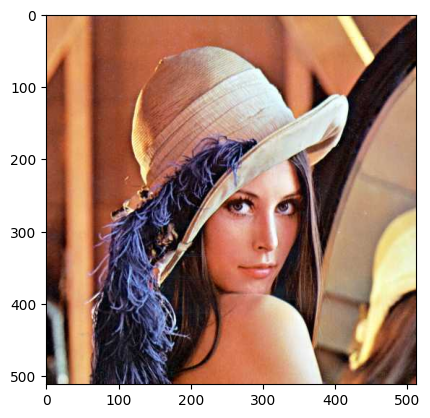

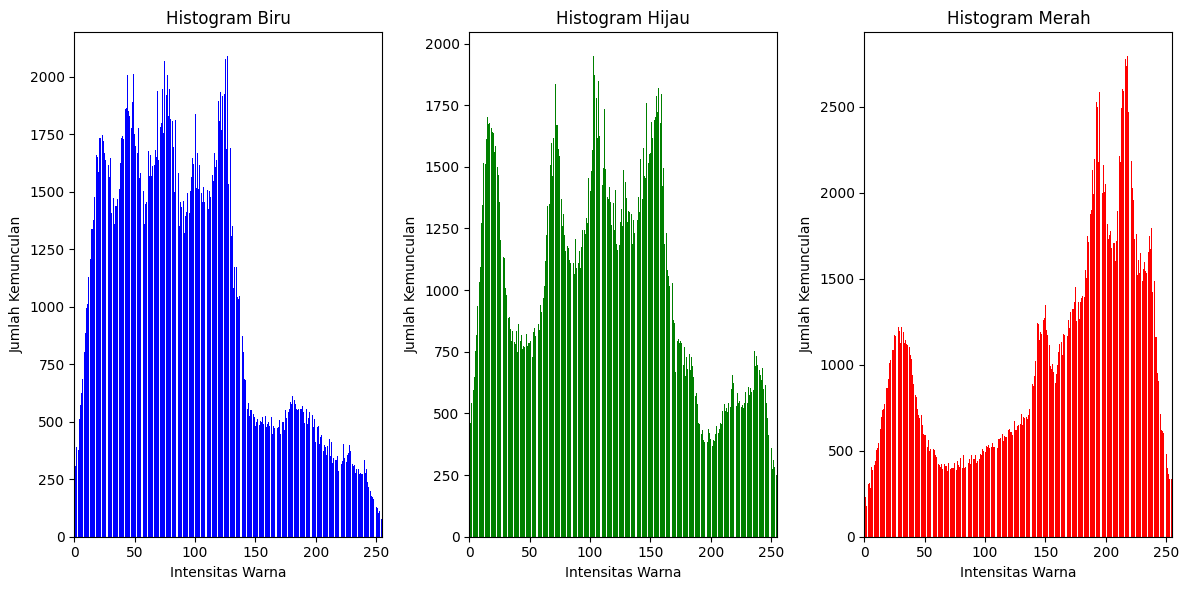

In [3]:
#1.Input image
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

#2.Menghitung jumlah kemunculan setiap pixel warna pd sluruh pixel citra yg ada
height, width, _=img.shape
hist_blue = np.zeros((256,))
hist_green = np.zeros((256,))
hist_red = np.zeros((256,))

for y in range(height):
  for x in range(width):
    blue = img[y, x, 0]
    green = img[y, x, 1]
    red = img[y, x, 2]
    hist_blue[blue] += 1
    hist_green[green] +=1
    hist_red[red] += 1

#Membuat Histogram dg sumbu x intensitas warna
intensities = np.arange(256)
plt.figure(figsize=(12,6))

# Histogram untuk saluran warna biru
plt.subplot(131)
plt.title('Histogram Biru')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.bar(intensities, hist_blue, color='blue')
plt.xlim([0, 255])

# Histogram untuk saluran warna hijau
plt.subplot(132)
plt.title('Histogram Hijau')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.bar(intensities, hist_green, color='green')
plt.xlim([0, 255])

# Histogram untuk saluran warna merah
plt.subplot(133)
plt.title('Histogram Merah')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.bar(intensities, hist_red, color='red')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()



penjelasan beberapa kode:
- height, width, _=img.shape, kode mengambil dimensi citra tinggi lebar
- Loopnya digunakan untuk mengiterasi melalui setiap piksel dalam citra.

4. **buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?**

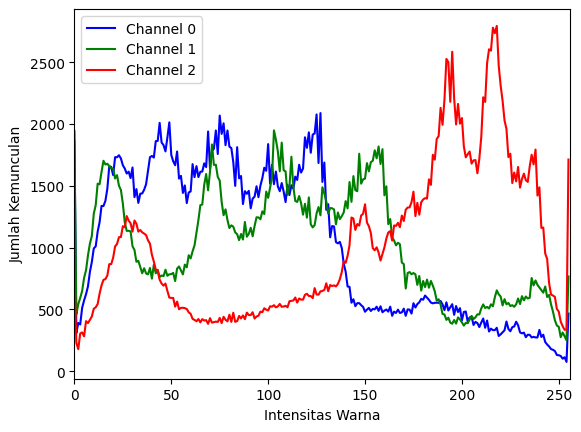

In [4]:
# Saluran warna dan warna yang sesuai
colors = ("b", "g", "r")
channel_ids = (0, 1, 2)

# Plot histogram
plt.xlim([0, 256])
for channel_id, color in zip(channel_ids, colors):
    histogram, _ = np.histogram(
        img[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(histogram, color=color, label=f'Channel {channel_id}')

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.legend()
plt.show()

5. **Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization!
(gambar lena_lc)**


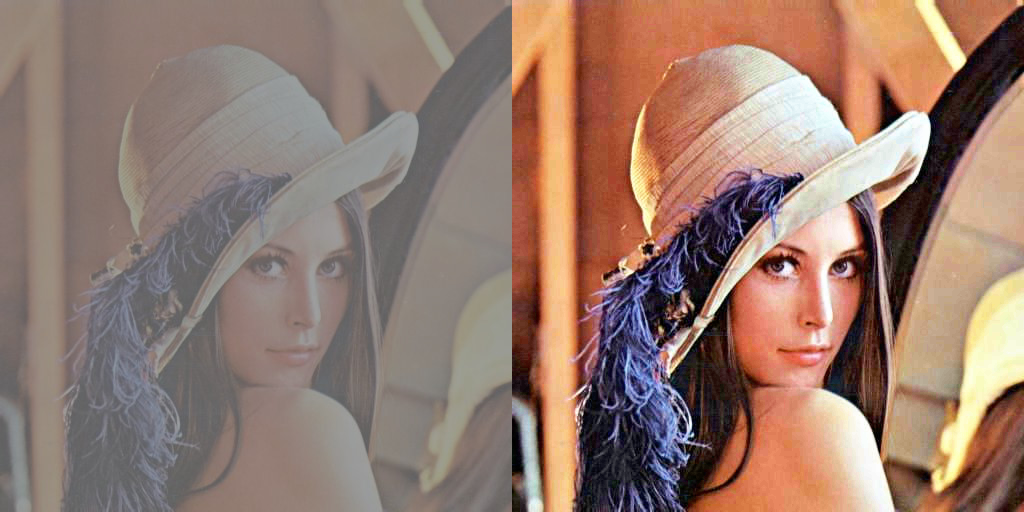

<BarContainer object of 256 artists>

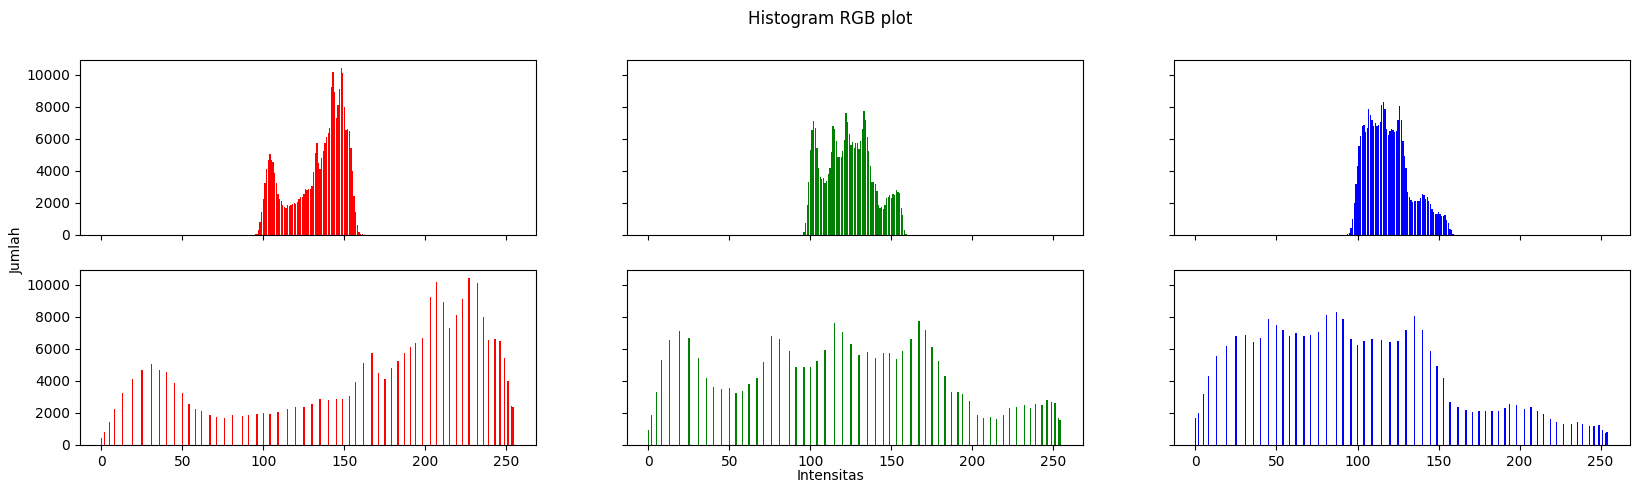

In [6]:
original = plt.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
cvt_img = cv.cvtColor(original,cv.COLOR_BGR2RGB)
names = np.arange(256)
height, width, depth = np.shape(original)

#menghitung jumlah kemunculan setiap intensitas warna
#pada saluran warna biru, hijau, dan merah
b = [0]*256
g = [0]*256
r = [0]*256

#Looping untuk Menghitung Histogram Setiap Saluran Warna
for y in range(0,height):
  for x in range(0,width):
    b[cvt_img[y][x][0]] += 1
    g[cvt_img[y][x][1]] += 1
    r[cvt_img[y][x][2]] += 1

def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histo_asli = histog(cvt_img)

img_array = np.asarray(cvt_img)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

#menghitung jumlah total piksel dalam citra
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#Histogram normalisasi diubah jadi histogram kumulati
chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((cvt_img, img2))
cv2_imshow(final_frame)

fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

6.  **buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”**. Bandingkan
hasilnya. Apakah output muncul sama?

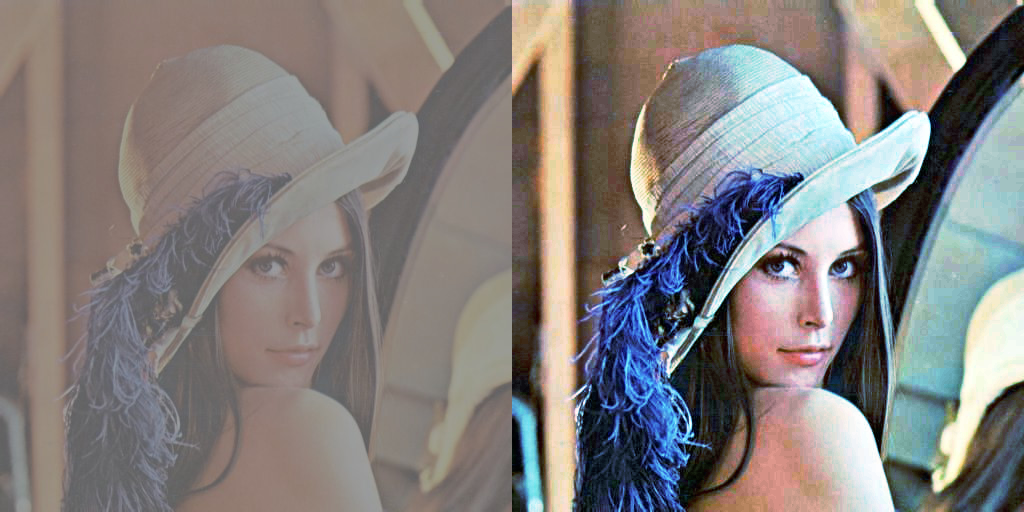

<BarContainer object of 256 artists>

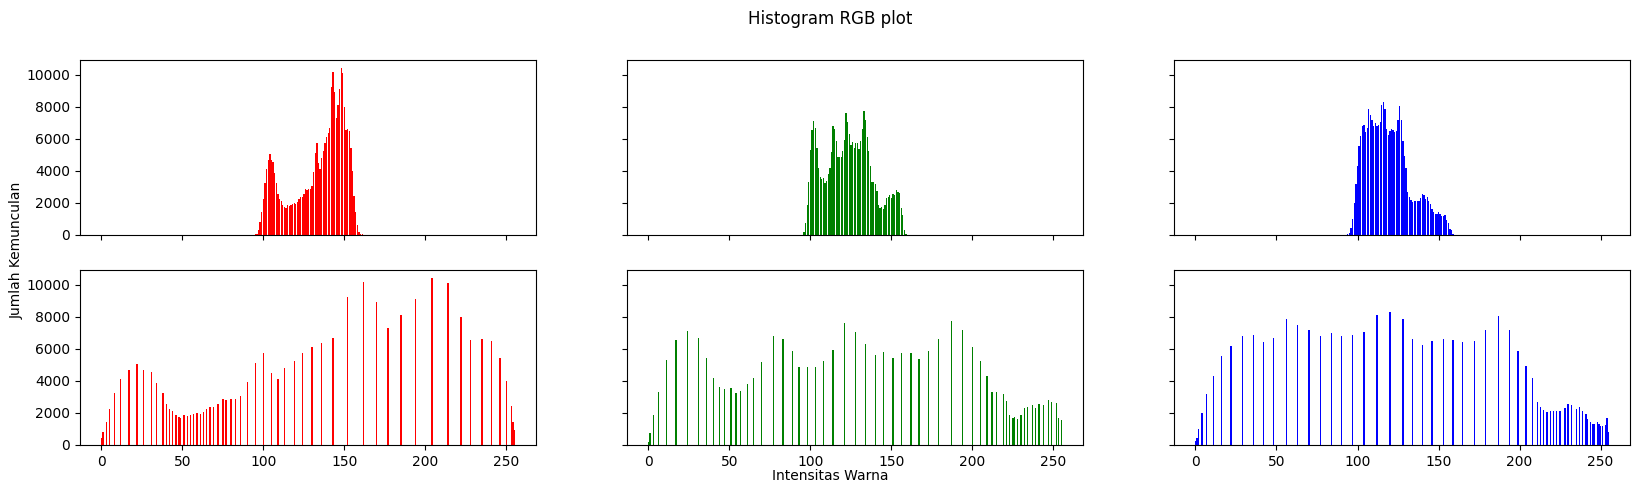

In [8]:
channels = cv.split(cvt_img) #membagi citra jd R,G,B
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))

eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)
# citra berwarna yang telah diperbaiki kontras dan pencahayaannya
# melalui Histogram Equalization,

final_frame = cv.hconcat((cvt_img, eq_image))
cv2_imshow(final_frame)

fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah ', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas ', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

7. **Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini!**

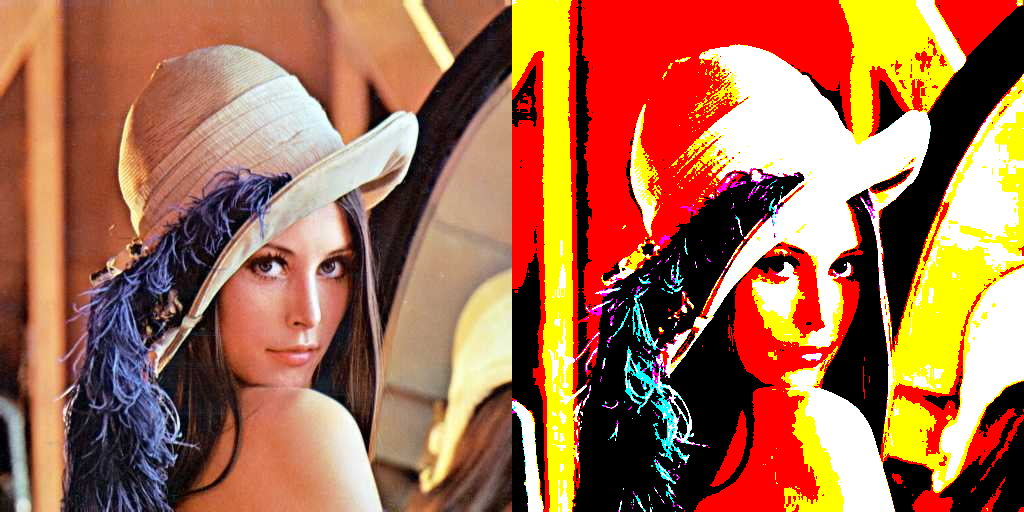

In [13]:
img = cv.imread('//content/drive/MyDrive/PCVK/lena.jpg')

colors = {

    (0, 0, 0): (0, 0, 0),       # Hitam
    (0, 255, 0): (0, 255, 0),   # Hijau
    (255, 255, 0): (255, 255, 0),  # Kuning
    (0, 0, 255): (0, 0, 255),   # Biru
    (0, 255, 255): (0, 255, 255),  # Cyan
    (255, 0, 255): (255, 0, 255),  # Magenta
    (255, 255, 255): (255, 255, 255),  # Putih
}

def colorSearch(rgb_color):
    min_dist = float('inf')
    nearest_color = None
    for color, target_rgb in colors.items():
        dist = np.linalg.norm(np.array(rgb_color) - np.array(target_rgb))
        # dist = (np.sum((np.array((rgb_color) - np.array(target_rgb)) ** 2)))**0.5 # Eclidean Norm
        if dist < min_dist:
            min_dist = dist
            nearest_color = color
    return nearest_color

def colorRev(image):
  new_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        pixel_color = tuple(image[y, x])
        nearest_color = colorSearch(pixel_color)
        new_image[y, x] = colors[nearest_color]

  return new_image

new_image = colorRev(img)

final_frame = cv.hconcat((img, new_image))
cv2_imshow(final_frame)

8.**Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)**

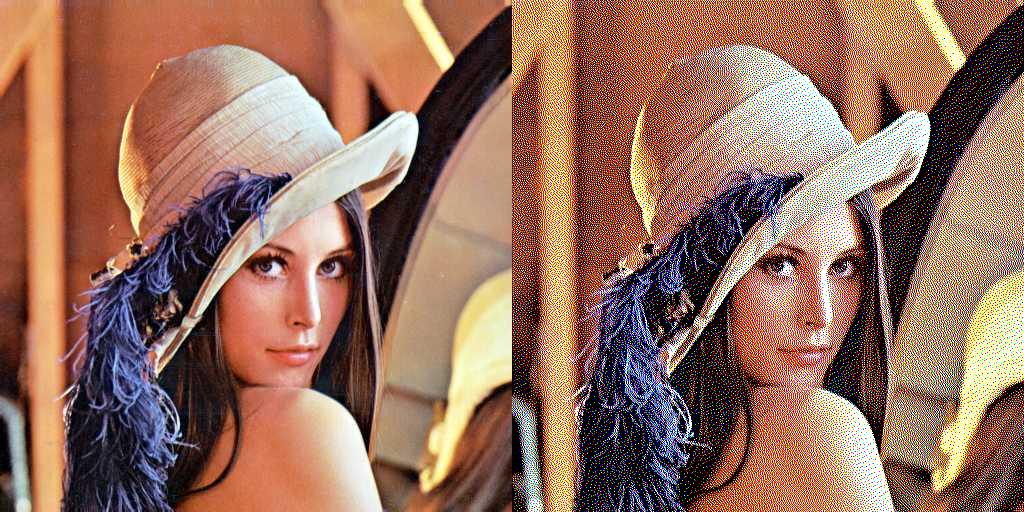

In [14]:
def floyd_steinberg_dithering(image):

  tinggi = image.shape[0]
  lebar = image.shape[1]
  channel = image.shape[2]
  jarak_pixel = 1

  # Looping pixel citra
  for y in range(tinggi):
    for x in range(lebar):
      for c in range(channel):
        # Jarak pixel tetangga
        pixel_old = image[y, x, c]

        # Menghitung pixel baru berdasar jarak dan juga batasan warna yang dimiliki
        pixel_new = np.round((jarak_pixel * pixel_old) / 255.0) * (255 / jarak_pixel)

        image[y, x, c] = pixel_new

        error = pixel_old - pixel_new

        # Lakukan untuk semua channel warna
        # Implementasi rumus dithering Floyd and Steinberg (R1-R4)
        if x + 1 < lebar:
          image[y, x + 1, c] = threshold(image[y, x + 1, c] + error * 7/16)
        if y + 1 < tinggi:
          if x - 1 >= 0:
            image[y + 1, x - 1, c] = threshold(image[y + 1, x - 1, c] + error * 3/16)
          image[y + 1, x, c] = threshold(image[y + 1, x, c] + error * 5/16)
          if x + 1 < lebar:
            image[y + 1, x + 1, c] = threshold(image[y + 1, x + 1, c] + error * 1/16)

  return image

def threshold(nilai_warna):
  if nilai_warna > 255:
    nilai_warna = 255
  elif nilai_warna < 0:
    nilai_warna = 0

  return nilai_warna

img2 = np.copy(img)

dithering_image = floyd_steinberg_dithering(img2)
final_frame = cv.hconcat((img, dithering_image))
cv2_imshow(final_frame)


9. **Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!**

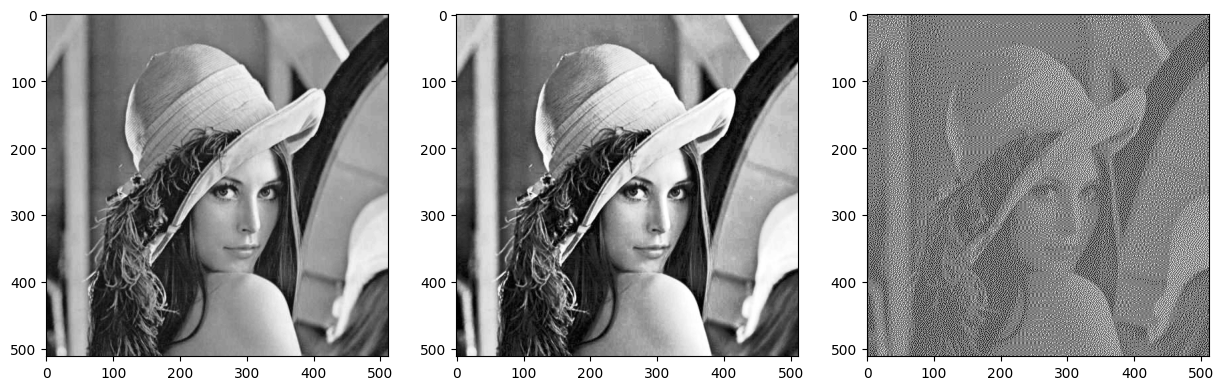

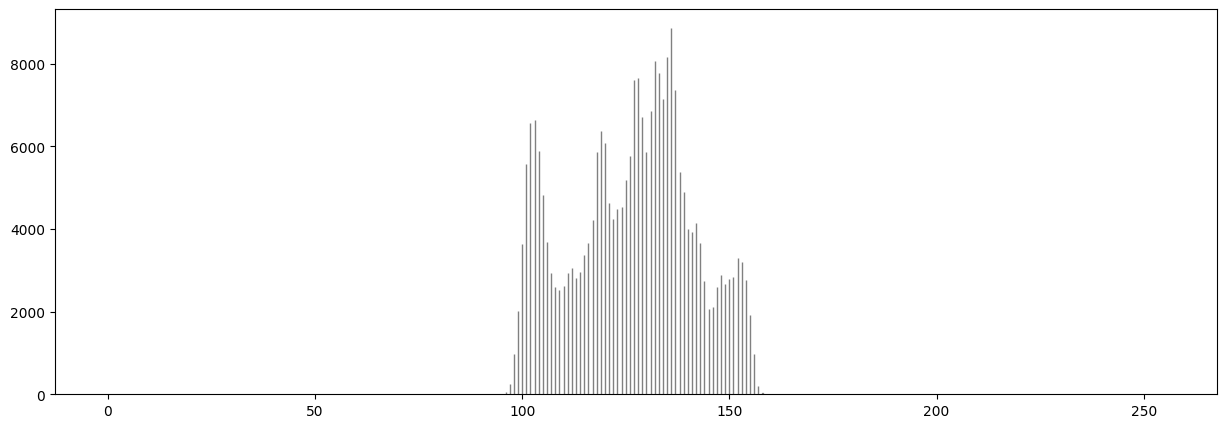

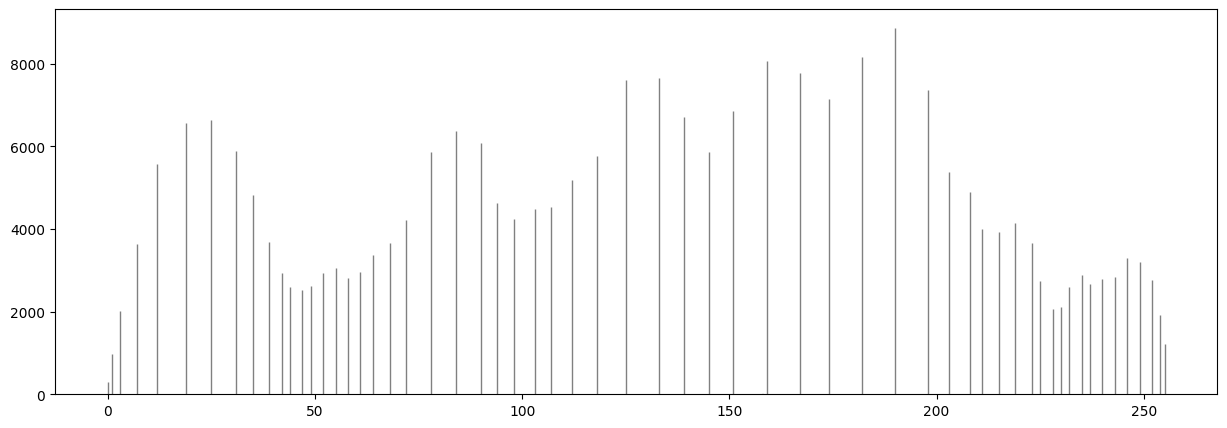

In [17]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

def makehistogram(gambar):
  hist1, bins1 = np.histogram(gambar, bins=256, range=[0,256])
  fig, axs = plt.subplots(1, 1, figsize=(15, 5))
  axs.bar(bins1[:-1], hist1, width=0.0005, color='gray', edgecolor='gray')

def dither(image):
  image = image.astype(float)
  height, width = image.shape[0], image.shape[1]

  for y in range(height):
      for x in range(width):
          old_pixel = image[y][x]
          new_pixel = np.round(old_pixel / 255) * 255
          image[y][x] = new_pixel
          quant_error = old_pixel - new_pixel

          if x + 1 < width:
            image[y][x + 1] += quant_error * 7 / 16
          if x - 1 >= 0 and y + 1 < height:
            image[y + 1][x - 1] += quant_error * 3 / 16
          if y + 1 < height:
            image[y + 1][x] += quant_error * 5 / 16
          if x + 1 < width and y + 1 < height:
            image[y + 1][x + 1] += quant_error * 1 / 16

  image = image.astype(np.uint8)
  return image

  hist_ori, bins_ori = makehistogram(img)
  hist_eq, bins_eq = makehistogram(img_eq)


img_eq = img.copy()
img_eq = cv.equalizeHist(img_eq)
img_dithered = dither(img)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# ori = makehistogram(img)
# eq = makehistogram(img_eq)

axs[0].imshow(img, cmap='gray')
hist_ori = makehistogram(img)
axs[1].imshow(img_eq, cmap='gray')
hist_eq = makehistogram(img_eq)
axs[2].imshow(img_dithered, cmap='gray')


plt.show()
